# imports

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score

# loading dataset

In [ ]:
real_news = pd.read_csv('/content/drive/MyDrive/datasets/real_news.csv')
fake_news = pd.read_csv('/content/drive/MyDrive/datasets/fake_news.csv')

# EDA

In [ ]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
real_news['is_fake']=0
fake_news['is_fake']=1

In [ ]:
real_news.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   is_fake  21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [ ]:
fake_news.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   is_fake  23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [ ]:
df = pd.concat([real_news,fake_news])
df.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   is_fake  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
is_fake    0
dtype: int64

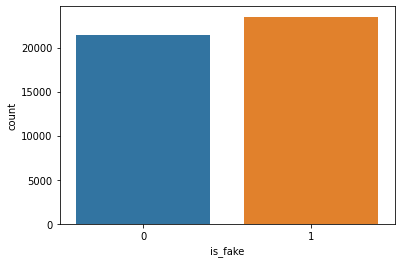

In [ ]:
sns.countplot(x='is_fake', data=df)

In [ ]:
df.drop(labels=['title','subject','date'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     44898 non-null  object
 1   is_fake  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['is_fake'], test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31428,)
(31428,)
(13470,)
(13470,)


In [ ]:
print(x_train[32])

WASHINGTON (Reuters) - Steve Bannon, a former top White House strategist and a former chief campaign aide to Donald Trump, has been asked to testify before the U.S. House of Representatives intelligence panel next month, Bloomberg News reported. Corey Lewandowski, Trump’s former campaign manager, was also asked to testify in early January, Bloomberg reported on Friday, citing an official familiar with the committee’s schedule.  Representatives for the committee did not immediately respond to inquiries for comment. The panel is probing alleged Russian meddling into the 2016 U.S. election. 


# pre-processing

In [ ]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # remove urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # remove non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

x_train = normalize(x_train)
x_test = normalize(x_test)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)

In [ ]:
import pickle
with open('/content/drive/MyDrive/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
x_train = tokenizer.texts_to_sequences(x_train)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, padding='post', maxlen=256)
x_test = tokenizer.texts_to_sequences(x_test)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, padding='post', maxlen=256)

# LSTM

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_6 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5,validation_split=0.1, batch_size=32, shuffle=True)

Epoch 1/5
884/884 [==============================] - 40s 39ms/step - loss: 0.2788 - accuracy: 0.8575 - val_loss: 0.0772 - val_accuracy: 0.9835
Epoch 2/5
884/884 [==============================] - 34s 38ms/step - loss: 0.0602 - accuracy: 0.9852 - val_loss: 0.0503 - val_accuracy: 0.9857
Epoch 3/5
884/884 [==============================] - 35s 39ms/step - loss: 0.0285 - accuracy: 0.9933 - val_loss: 0.0505 - val_accuracy: 0.9870
Epoch 4/5
884/884 [==============================] - 33s 38ms/step - loss: 0.0186 - accuracy: 0.9961 - val_loss: 0.0476 - val_accuracy: 0.9847
Epoch 5/5
884/884 [==============================] - 34s 38ms/step - loss: 0.0329 - accuracy: 0.9945 - val_loss: 0.0552 - val_accuracy: 0.9870


In [ ]:
model.evaluate(x_test,y_test)

421/421 [==============================] - 8s 18ms/step - loss: 0.0479 - accuracy: 0.9888


[0.04787794128060341, 0.9887899160385132]

# Pickle

In [ ]:
import pickle

with open('/content/drive/MyDrive/fakeNews.pkl','wb') as file:
  pickle.dump(model,file)

In [ ]:
with open('/content/drive/MyDrive/fakeNews.pkl' , 'rb') as file2:
  loaded_model = pickle.load(file2)

In [ ]:
loaded_model.evaluate(x_test,y_test)

421/421 [==============================] - 9s 18ms/step - loss: 0.0479 - accuracy: 0.9888


[0.04787794128060341, 0.9887899160385132]

# LSTM with Early Stop

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         128000    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
943/943 [==============================] - 42s 39ms/step - loss: 0.2667 - accuracy: 0.8515 - val_loss: 0.0568 - val_accuracy: 0.9815
Epoch 2/10
943/943 [==============================] - 36s 38ms/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0377 - val_accuracy: 0.9850
Epoch 3/10
943/943 [==============================] - 36s 38ms/step - loss: 0.0310 - accuracy: 0.9912 - val_loss: 0.0314 - val_accuracy: 0.9901
Epoch 4/10
943/943 [==============================] - 35s 37ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0334 - val_accuracy: 0.9863
Epoch 5/10
943/943 [==============================] - 36s 39ms/step - loss: 0.0208 - accuracy: 0.9941 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 6/10
943/943 [==============================] - 35s 37ms/step - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.0386 - val_accuracy: 0.9901
Epoch 7/10
943/943 [==============================] - 35s 37ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0348 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

421/421 [==============================] - 8s 18ms/step - loss: 0.0308 - accuracy: 0.9909


[0.030843354761600494, 0.9909428358078003]

# Testing Model

In [ ]:
# real news
text = "Trump travel ban should not apply to people with strong U.S. ties: court"
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)

In [ ]:
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[  12  837  547  111   24 2293    2   45   16  663   37    7  657  133]]
1/1 [==============================] - 1s 1s/step
[[-2.3495247]]


In [ ]:
# real news
text = "Deputy Attorney General Rosenstein interviewed over FBI ex-director's firing: WSJ"
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)

In [ ]:
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[ 953  482  226 4381 2693   68  282 2437  325    7 2264 9672]]
1/1 [==============================] - 1s 1s/step
[[1.2876489]]


In [ ]:
# real news
text = "New York governor questions the constitutionality of federal tax overhaul"
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)

In [ ]:
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[  62  230  440  712    1    3  180  189 2461]]
1/1 [==============================] - 0s 18ms/step
[[-2.2156749]]


In [ ]:
# real news
text = "White House pressures Big Corn to meet on U.S. biofuels policy"
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[  89   74  421 9517    2  752    9   37    7  221]]
1/1 [==============================] - 0s 17ms/step
[[-2.143009]]


In [ ]:
# real news
text = "Putin says Trump hampered from delivering electoral promises"
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[ 536  198   12   25 4711 1485 2238]]
1/1 [==============================] - 0s 17ms/step
[[0.42286316]]


In [ ]:
# fake news
text = "President Donald Trump has sold all his wealth to become a saint."
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)

In [ ]:
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[  35   69   12   21 2535   55   19 2866    2  397    4 7625]]
1/1 [==============================] - 0s 17ms/step
[[1.6008791]]


In [ ]:
# fake news
text = 'Trump’s White House IMPLODES As Kellyanne Conway Attacks Fellow Top Staffer (VIDEO)'
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)

In [ ]:
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[  12    7   89   74   18 3508 1765  414 1157  277 3748  227]]
1/1 [==============================] - 0s 17ms/step
[[1.9794002]]


In [ ]:
# fake news
text = 'Racist Alabama Cops Brutalize Black Boy While He Is In Handcuffs (GRAPHIC IMAGES)'
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[ 661 1735 2253  231 2094  107   14   11    6 3503  494]]
1/1 [==============================] - 0s 18ms/step
[[1.9020158]]


In [ ]:
# fake news
text = 'Obama Photographer BRILLIANTLY Trolls Trump’s Wildly Inappropriate Speech To The Boy Scouts (IMAGE)'
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[  72 7216 9886 8206   12    7 7208 3180  305    2    1 2094  199]]
1/1 [==============================] - 0s 19ms/step
[[3.2439501]]


In [ ]:
# fake news
text = 'Like Father, Like Son: Trump Jr. Wakes Up Tweeting Desperate Nonsense About The Press And Democrats'
l = []
l.append(text)
normalized_text = normalize(l)
tokenized_text = tokenizer.texts_to_sequences(normalized_text)
preprocesses_text = tf.keras.preprocessing.sequence.pad_sequences(tokenized_text)
print(preprocesses_text)
prediction = model.predict(preprocesses_text)
print(prediction)

[[  87  863   87  806   12 1430   61 3715 2713 4226   39    1  341    5
   207]]
1/1 [==============================] - 0s 20ms/step
[[2.1779993]]


## prediction > 0.5 ---> Fake
## prediction < 0.5 ---> Real

# BERT